In [ ]:
# Loading the cleaned dataset for classification modelingimport pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CW/classification_dataset_cleaned.csv')
df.head(15)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,1.187350,0,0,0,0,1,3,1,-1.253831,1,1,1.184467,-0.618172,60,0
1,-0.350985,0,1,1,2,0,2,1,0.215547,1,1,-0.045957,0.164807,62,0
2,0.332720,0,2,2,4,0,2,1,1.542726,1,1,-0.045957,0.556296,75,0
3,0.332720,0,0,0,0,1,3,1,-0.590241,1,1,-1.522467,-0.618172,84,0
4,-0.607374,0,1,0,1,1,3,1,0.499942,1,1,-1.399425,-0.618172,50,0
5,-0.265522,0,0,0,0,0,2,1,-0.495442,1,1,0.446212,-0.422427,89,0
6,-0.265522,0,0,0,0,3,1,1,-1.064234,1,1,-0.415085,-0.618172,54,0
7,-1.205615,0,1,0,1,0,2,1,-0.021450,1,1,-0.661170,-0.618172,14,1
8,-1.205615,0,3,2,4,1,3,1,3.438697,1,1,0.692297,2.709487,70,0
9,1.272813,0,3,2,4,3,1,0,0.073349,1,1,0.815340,1.535019,92,0


In [ ]:
# Displaying information about the dataset structuredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   float64
 1   Sex                     4024 non-null   int64  
 2   T_Stage                 4024 non-null   int64  
 3   N_Stage                 4024 non-null   int64  
 4   6th_Stage               4024 non-null   int64  
 5   Differentiated          4024 non-null   int64  
 6   Grade                   4024 non-null   int64  
 7   A_Stage                 4024 non-null   int64  
 8   Tumor_Size              4024 non-null   float64
 9   Estrogen_Status         4024 non-null   int64  
 10  Progesterone_Status     4024 non-null   int64  
 11  Regional_Node_Examined  4024 non-null   float64
 12  Reginol_Node_Positive   4024 non-null   float64
 13  Survival_Months         4024 non-null   int64  
 14  Mortality_Status        4024 non-null   

In [ ]:
# Checking the class distribution of the target variable
df['Mortality_Status'].value_counts()

,count
Mortality_Status,
0,3408
1,616


In [ ]:
# Defining the feature columns to be used for modeling
feature_cols = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
                'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']

In [ ]:
# Separating features (X) and target variable (y)
X = df[feature_cols]
y = df['Mortality_Status']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (4024, 13)
Target vector shape: (4024,)


In [ ]:
# Importing the train_test_split function for data splitting
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into training (70%) and testing (30%) sets while maintaining class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Verifying that class distribution is maintained in both training and test sets
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Test set class distribution:\n{y_test.value_counts()}")

Training set class distribution:
Mortality_Status
0    2385
1     431
Name: count, dtype: int64
Test set class distribution:
Mortality_Status
0    1023
1     185
Name: count, dtype: int64


In [ ]:
# Importing necessary libraries for logistic regression modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
# Initializing the logistic regression model with a fixed random state for reproducibility
logreg = LogisticRegression(random_state=42)

In [ ]:
# Training the logistic regression model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Making predictions on the training set to assess training performance
y_pred_train_lr = logreg.predict(X_train)

In [ ]:
# Calculating and displaying the training accuracy of the logistic regression model
lr_train_accuracy = accuracy_score(y_train, y_pred_train_lr)
print(f"Logistic Regression training accuracy: {lr_train_accuracy:.4f}")

Logistic Regression training accuracy: 0.8580


In [ ]:
# Making predictions on the test set to evaluate model performance
y_pred_lr = logreg.predict(X_test)

In [ ]:
# Creating a comparison dataframe to visualize actual vs. predicted values
comparison_df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
print(comparison_df_lr.head(10))

      Actual  Predicted
3183       0          0
93         1          0
1479       0          0
1545       0          0
2904       0          0
21         0          0
1219       0          0
2288       1          0
305        1          1
2169       0          0


In [ ]:
# Calculating and displaying the confusion matrix for the logistic regression model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_lr))

[[1011   12]
 [ 161   24]]


In [ ]:
# Generating a detailed classification report with precision, recall, and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1023
           1       0.67      0.13      0.22       185

    accuracy                           0.86      1208
   macro avg       0.76      0.56      0.57      1208
weighted avg       0.83      0.86      0.81      1208



In [ ]:
# Creating a balanced logistic regression model to address class imbalance
logreg_balanced = LogisticRegression(class_weight='balanced', random_state=42)
logreg_balanced.fit(X_train, y_train)
y_pred_balanced = logreg_balanced.predict(X_test)

print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1023
           1       0.30      0.62      0.40       185

    accuracy                           0.72      1208
   macro avg       0.61      0.68      0.61      1208
weighted avg       0.82      0.72      0.75      1208



<Figure size 800x600 with 0 Axes>

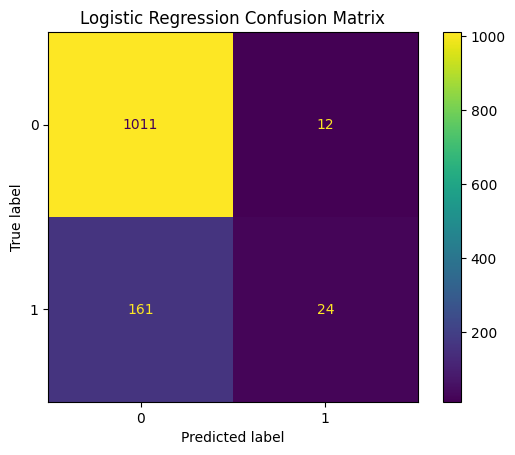

In [ ]:
# Visualizing the confusion matrix for the logistic regression model
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Calculate the confusion matrix and store it in cm_lr
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=logreg.classes_)
disp_lr.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>

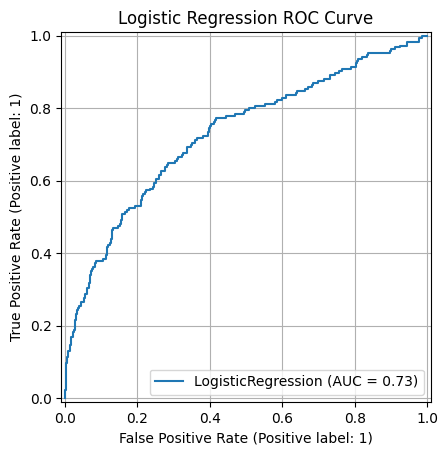

In [ ]:
# Plotting the ROC curve for logistic regression to evaluate its performance
plt.figure(figsize=(8, 6))
roc_display_lr = RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title('Logistic Regression ROC Curve')
plt.grid(True)
plt.show()

In [ ]:
# Importing the K-Nearest Neighbors classifier for the second model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initializing the KNN model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Training the KNN model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Making predictions on the test set using the KNN model
y_pred_knn = knn.predict(X_test)

In [ ]:
# Calculating and displaying the test accuracy of the KNN model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN (k=5) test accuracy: {knn_accuracy:.4f}")

KNN (k=5) test accuracy: 0.8386


In [ ]:
# Calculating and displaying the confusion matrix for the KNN model
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[986  37]
 [158  27]]


<Figure size 800x600 with 0 Axes>

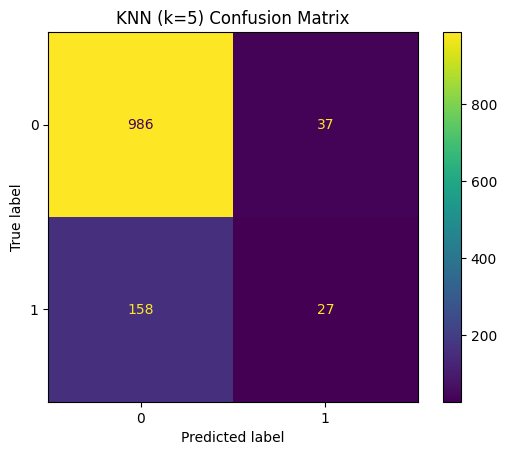

In [ ]:
# Visualizing the confusion matrix for the KNN model
plt.figure(figsize=(8, 6))
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=[0, 1])
disp_knn.plot()
plt.title('KNN (k=5) Confusion Matrix')
plt.show()

In [ ]:
# Generating a detailed classification report for the KNN model
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1023
           1       0.42      0.15      0.22       185

    accuracy                           0.84      1208
   macro avg       0.64      0.55      0.56      1208
weighted avg       0.79      0.84      0.80      1208



<Figure size 800x600 with 0 Axes>

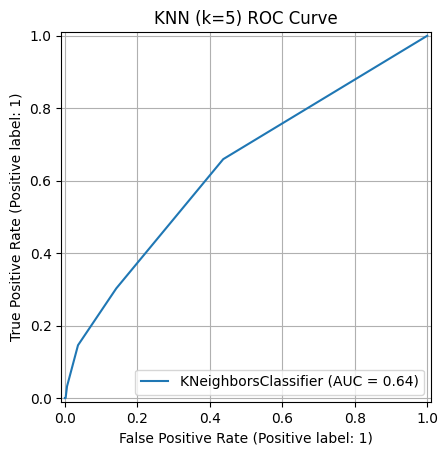

In [ ]:
# Plotting the ROC curve for the KNN model to evaluate its performance
plt.figure(figsize=(8, 6))
roc_display_knn = RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title('KNN (k=5) ROC Curve')
plt.grid(True)
plt.show()

In [ ]:
# Importing and initializing the Gaussian Naive Bayes classifier for the third model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [ ]:
# Training the Naive Bayes model on the training data
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Making predictions on the test set using the Naive Bayes model
y_pred_nb = nb.predict(X_test)

In [ ]:
# Calculating and displaying the test accuracy of the Naive Bayes model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes test accuracy: {nb_accuracy:.4f}")

Naive Bayes test accuracy: 0.7897


In [ ]:
# Calculating and displaying the confusion matrix for the Naive Bayes model
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[883 140]
 [114  71]]


<Figure size 800x600 with 0 Axes>

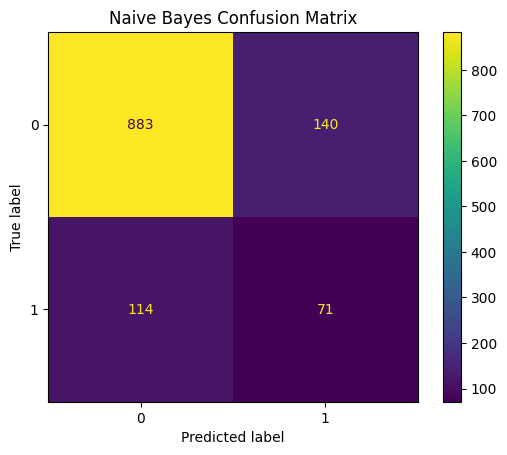

In [ ]:
# Visualizing the confusion matrix for the Naive Bayes model
plt.figure(figsize=(8, 6))
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=[0, 1])
disp_nb.plot()
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [ ]:
# Generating a detailed classification report for the Naive Bayes model
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1023
           1       0.34      0.38      0.36       185

    accuracy                           0.79      1208
   macro avg       0.61      0.62      0.62      1208
weighted avg       0.80      0.79      0.80      1208



<Figure size 800x600 with 0 Axes>

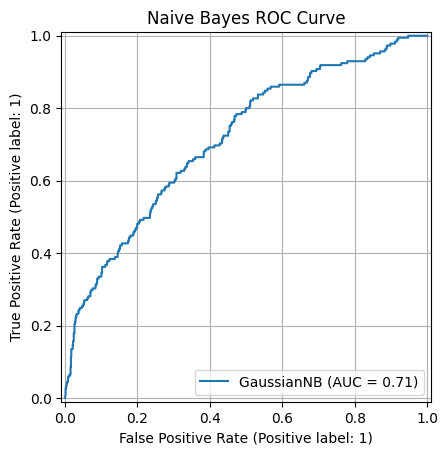

In [ ]:
# Plotting the ROC curve for the Naive Bayes model to evaluate its performance
plt.figure(figsize=(8, 6))
roc_display_nb = RocCurveDisplay.from_estimator(nb, X_test, y_test)
plt.title('Naive Bayes ROC Curve')
plt.grid(True)
plt.show()

In [ ]:
# Calculating the logistic regression test accuracy and comparing all three models
y_pred_test_lr = logreg.predict(X_test) # Predict on the test set
lr_test_accuracy = accuracy_score(y_test, y_pred_test_lr) # Calculate test accuracy

# Now, the final cell should work correctly
print(f"Logistic Regression: {lr_test_accuracy:.4f}")
print(f"KNN (k=5): {knn_accuracy:.4f}")
print(f"Naive Bayes: {nb_accuracy:.4f}")

Logistic Regression: 0.8568
KNN (k=5): 0.8386
Naive Bayes: 0.7897


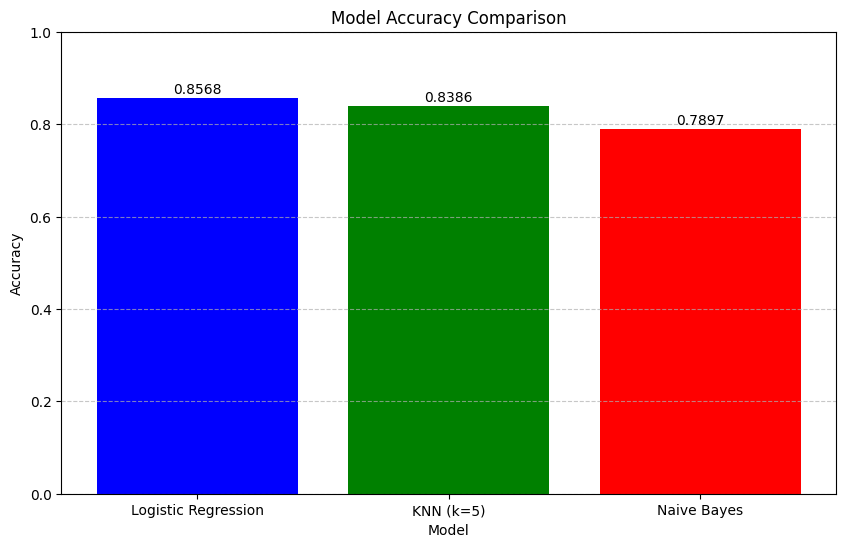

In [ ]:
# Creating a bar chart to visually compare model accuracies
plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'KNN (k=5)', 'Naive Bayes']
accuracies = [lr_test_accuracy, knn_accuracy, nb_accuracy]
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
plt.show()

In [ ]:
# Importing GridSearchCV for hyperparameter optimization
from sklearn.model_selection import GridSearchCV

In [ ]:
# Defining the parameter grid for KNN hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
# Setting up GridSearchCV for KNN with 5-fold cross-validation
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

In [ ]:
# Performing hyperparameter tuning for KNN using the entire dataset
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Displaying the best parameters and corresponding cross-validation score for KNN
print(f"Best parameters: {knn_gscv.best_params_}")
print(f"Best cross-validation score: {knn_gscv.best_score_:.4f}")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score: 0.8504


In [ ]:
# Examining the top performing parameter combinations for KNN
knn_grid_results = pd.DataFrame(knn_gscv.cv_results_)
knn_grid_results = knn_grid_results.sort_values(by='rank_test_score')
print(knn_grid_results[['params', 'mean_test_score']].head())

                                               params  mean_test_score
18  {'metric': 'manhattan', 'n_neighbors': 11, 'we...         0.850398
8   {'metric': 'euclidean', 'n_neighbors': 11, 'we...         0.848658
6   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...         0.846171
16  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...         0.845428
19  {'metric': 'manhattan', 'n_neighbors': 11, 'we...         0.844930


In [ ]:
# Evaluating the optimized KNN model on the test set
y_pred_knn_opt = knn_gscv.predict(X_test)
knn_opt_accuracy = accuracy_score(y_test, y_pred_knn_opt)
print(f"Optimized KNN test accuracy: {knn_opt_accuracy:.4f}")

Optimized KNN test accuracy: 0.8543


In [ ]:
# Calculating and displaying the confusion matrix for the optimized KNN model
cm_knn_opt = confusion_matrix(y_test, y_pred_knn_opt)
print(cm_knn_opt)

[[1014    9]
 [ 167   18]]


<Figure size 800x600 with 0 Axes>

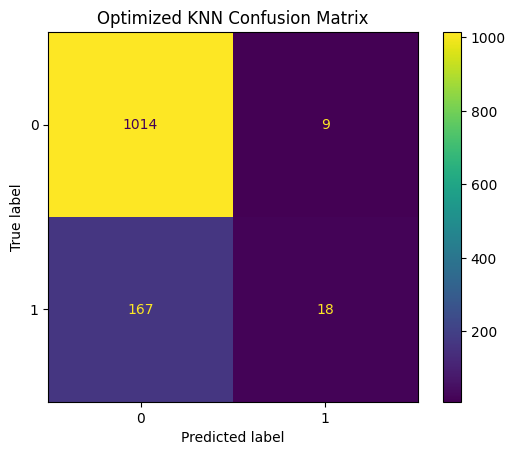

In [ ]:
# Visualizing the confusion matrix for the optimized KNN model
plt.figure(figsize=(8, 6))
disp_knn_opt = ConfusionMatrixDisplay(confusion_matrix=cm_knn_opt, display_labels=[0, 1])
disp_knn_opt.plot()
plt.title('Optimized KNN Confusion Matrix')
plt.show()

In [ ]:
# Generating a detailed classification report for the optimized KNN model
print(classification_report(y_test, y_pred_knn_opt))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1023
           1       0.67      0.10      0.17       185

    accuracy                           0.85      1208
   macro avg       0.76      0.54      0.54      1208
weighted avg       0.83      0.85      0.81      1208



<Figure size 800x600 with 0 Axes>

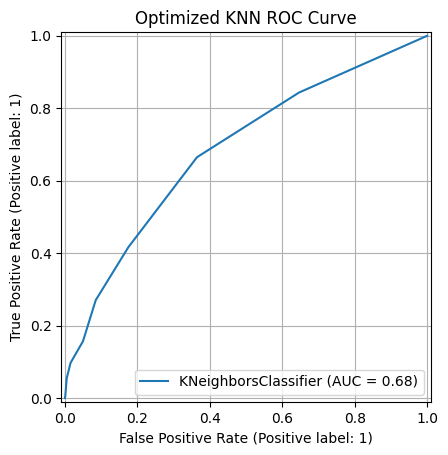

In [ ]:
# Plotting the ROC curve for the optimized KNN model
plt.figure(figsize=(8, 6))
best_knn = KNeighborsClassifier(**knn_gscv.best_params_)
best_knn.fit(X_train, y_train)
roc_display_knn_opt = RocCurveDisplay.from_estimator(best_knn, X_test, y_test)
plt.title('Optimized KNN ROC Curve')
plt.grid(True)
plt.show()

In [ ]:
# Defining the parameter grid for Logistic Regression hyperparameter tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    'penalty': ['l2']
}

In [ ]:
# Setting up GridSearchCV for Logistic Regression with 5-fold cross-validation
lr_gscv = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')

In [ ]:
# Performing hyperparameter tuning for Logistic Regression using the entire dataset
lr_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             scoring='accuracy')

In [ ]:
# Displaying the best parameters and corresponding cross-validation score for Logistic Regression
print(f"Best parameters: {lr_gscv.best_params_}")
print(f"Best cross-validation score: {lr_gscv.best_score_:.4f}")

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.8574


In [ ]:
# Examining the top performing parameter combinations for Logistic Regression
lr_grid_results = pd.DataFrame(lr_gscv.cv_results_)
lr_grid_results = lr_grid_results.sort_values(by='rank_test_score')
print(lr_grid_results[['params', 'mean_test_score']].head())

                                               params  mean_test_score
7      {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}         0.857356
8   {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...         0.857356
11   {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}         0.857108
10       {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}         0.856860
14  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}         0.856860


In [ ]:
# Evaluating the optimized Logistic Regression model on the test set
y_pred_lr_opt = lr_gscv.predict(X_test)
lr_opt_accuracy = accuracy_score(y_test, y_pred_lr_opt)
print(f"Optimized Logistic Regression test accuracy: {lr_opt_accuracy:.4f}")

Optimized Logistic Regression test accuracy: 0.8593


In [ ]:
#Calculating and displaying the confusion matrix for the optimized Logistic Regression model
cm_lr_opt = confusion_matrix(y_test, y_pred_lr_opt)
print(cm_lr_opt)

[[1013   10]
 [ 160   25]]


<Figure size 800x600 with 0 Axes>

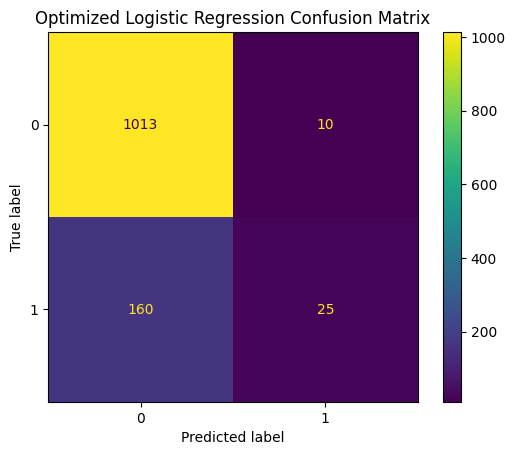

In [ ]:
# Visualizing the confusion matrix for the optimized Logistic Regression model
plt.figure(figsize=(8, 6))
disp_lr_opt = ConfusionMatrixDisplay(confusion_matrix=cm_lr_opt, display_labels=[0, 1])
disp_lr_opt.plot()
plt.title('Optimized Logistic Regression Confusion Matrix')
plt.show()

In [ ]:
# Generating a detailed classification report for the optimized Logistic Regression model
print(classification_report(y_test, y_pred_lr_opt))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1023
           1       0.71      0.14      0.23       185

    accuracy                           0.86      1208
   macro avg       0.79      0.56      0.57      1208
weighted avg       0.84      0.86      0.82      1208



<Figure size 800x600 with 0 Axes>

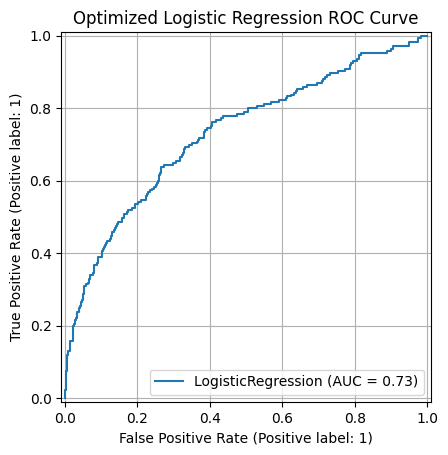

In [ ]:
# Plotting the ROC curve for the optimized Logistic Regression model
plt.figure(figsize=(8, 6))
best_lr = LogisticRegression(random_state=42, **lr_gscv.best_params_)
best_lr.fit(X_train, y_train)
roc_display_lr_opt = RocCurveDisplay.from_estimator(best_lr, X_test, y_test)
plt.title('Optimized Logistic Regression ROC Curve')
plt.grid(True)
plt.show()

In [ ]:
# Defining the parameter grid for Naive Bayes hyperparameter tuning
import numpy as nump
param_grid_nump = {
    'var_smoothing': nump.logspace(0,-9, num=10)
}

In [ ]:
# Setting up GridSearchCV for Naive Bayes with 5-fold cross-validation
nb_gscv = GridSearchCV(GaussianNB(), param_grid_nump, cv=5, scoring='accuracy')

In [ ]:
# Performing hyperparameter tuning for Naive Bayes using the entire dataset
nb_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             scoring='accuracy')

In [ ]:
# Displaying the best parameters and corresponding cross-validation score for Naive Bayes
print(f"Best parameters: {nb_gscv.best_params_}")
print(f"Best cross-validation score: {nb_gscv.best_score_:.4f}")

Best parameters: {'var_smoothing': np.float64(1.0)}
Best cross-validation score: 0.8489


In [ ]:
# Examining the top performing parameter combinations for Naive Bayes
nb_grid_results = pd.DataFrame(nb_gscv.cv_results_)
nb_grid_results = nb_grid_results.sort_values(by='rank_test_score')
print(nb_grid_results[['params', 'mean_test_score']].head())

                      params  mean_test_score
0     {'var_smoothing': 1.0}         0.848904
1     {'var_smoothing': 0.1}         0.817837
2    {'var_smoothing': 0.01}         0.793235
3   {'var_smoothing': 0.001}         0.793235
4  {'var_smoothing': 0.0001}         0.790998


In [ ]:
# Evaluating the optimized Naive Bayes model on the test set
y_pred_nb_opt = nb_gscv.predict(X_test)
nb_opt_accuracy = accuracy_score(y_test, y_pred_nb_opt)
print(f"Optimized Naive Bayes test accuracy: {nb_opt_accuracy:.4f}")

Optimized Naive Bayes test accuracy: 0.8526


In [ ]:
# Calculating and displaying the confusion matrix for the optimized Naive Bayes model
cm_nb_opt = confusion_matrix(y_test, y_pred_nb_opt)
print(cm_nb_opt)

[[1004   19]
 [ 159   26]]


<Figure size 800x600 with 0 Axes>

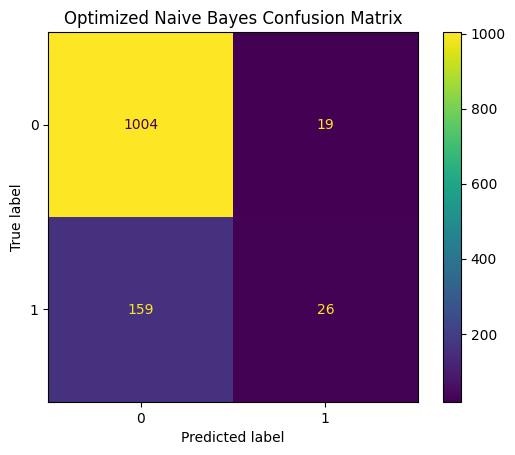

In [ ]:
# Visualizing the confusion matrix for the optimized Naive Bayes model
plt.figure(figsize=(8, 6))
disp_nb_opt = ConfusionMatrixDisplay(confusion_matrix=cm_nb_opt, display_labels=[0, 1])
disp_nb_opt.plot()
plt.title('Optimized Naive Bayes Confusion Matrix')
plt.show()

In [ ]:
# Generating a detailed classification report for the optimized Naive Bayes model
print(classification_report(y_test, y_pred_nb_opt))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1023
           1       0.58      0.14      0.23       185

    accuracy                           0.85      1208
   macro avg       0.72      0.56      0.57      1208
weighted avg       0.82      0.85      0.81      1208



<Figure size 800x600 with 0 Axes>

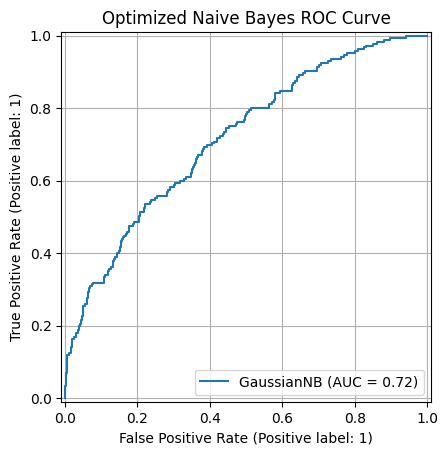

In [ ]:
# Plotting the ROC curve for the optimized Naive Bayes model
plt.figure(figsize=(8, 6))
best_nb = GaussianNB(**nb_gscv.best_params_)
best_nb.fit(X_train, y_train)
roc_display_nb_opt = RocCurveDisplay.from_estimator(best_nb, X_test, y_test)
plt.title('Optimized Naive Bayes ROC Curve')
plt.grid(True)
plt.show()

In [ ]:
# Comparing original and optimized accuracies for all three models
print(f"Logistic Regression: {lr_test_accuracy:.4f} -> {lr_opt_accuracy:.4f}")
print(f"KNN: {knn_accuracy:.4f} -> {knn_opt_accuracy:.4f}")
print(f"Naive Bayes: {nb_accuracy:.4f} -> {nb_opt_accuracy:.4f}")

Logistic Regression: 0.8568 -> 0.8593
KNN: 0.8386 -> 0.8543
Naive Bayes: 0.7897 -> 0.8526


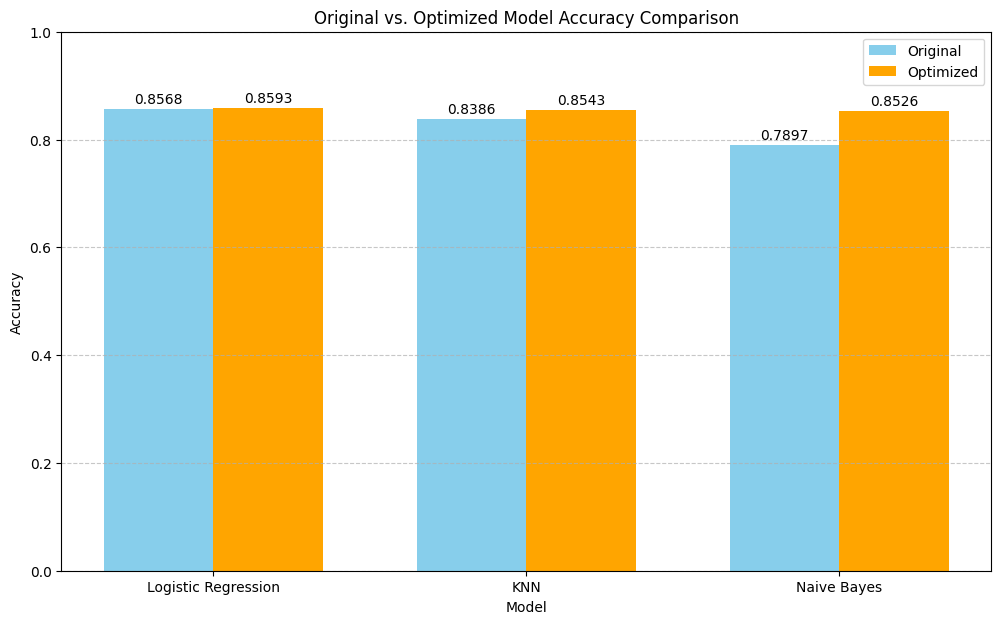

In [ ]:
# Creating a grouped bar chart to compare original and optimized model accuracies
plt.figure(figsize=(12, 7))
models = ['Logistic Regression', 'KNN', 'Naive Bayes']
original_accuracies = [lr_test_accuracy, knn_accuracy, nb_accuracy]
optimized_accuracies = [lr_opt_accuracy, knn_opt_accuracy, nb_opt_accuracy]

x = nump.arange(len(models))
width = 0.35

plt.bar(x - width/2, original_accuracies, width, label='Original', color='skyblue')
plt.bar(x + width/2, optimized_accuracies, width, label='Optimized', color='orange')

plt.title('Original vs. Optimized Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(original_accuracies):
    plt.text(i - width/2, v + 0.01, f'{v:.4f}', ha='center')

for i, v in enumerate(optimized_accuracies):
    plt.text(i + width/2, v + 0.01, f'{v:.4f}', ha='center')

plt.show()

In [ ]:
# Identifying and displaying the best performing model after hyperparameter tuning
best_model_name = models[nump.argmax(optimized_accuracies)]
best_accuracy = max(optimized_accuracies)

print(f"\nBest performing model after hyperparameter tuning: {best_model_name}")
print(f"Best accuracy: {best_accuracy:.4f}")


Best performing model after hyperparameter tuning: Logistic Regression
Best accuracy: 0.8593
